# Phase 3 Instructions

The purpose of this file is to analyse the phase 3 data. It will extract the journey time for each patient. It then removes outliers and creates visualisations based on the remaining patients.

## Package and Function Requirements

The next section loads in the required functions and packages.

In [ ]:
def lookup(date_pd_series, format=None):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date, format=format) for date in date_pd_series.unique()}
    return date_pd_series.map(dates)

## File Load In

Please note that the file used for phase 3 is called phase3_all_to_20220311.csv. It is in the MS Teams folder. 

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
import datetime as dt
import math
import seaborn as sns
import scipy.stats as sps
from scipy import stats
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_list_noweekend = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

dftest = pd.read_csv('phase3_all_to_20220311.csv')

## Data Cleaning and Formatting

The section below is very similar if not the same across all three phases. Key differences are called out but this is where the data is formatted for analysis.

In [ ]:
dftest.dtypes

Patient     object
Location    object
from        object
to          object
dtype: object

In [ ]:
dftest = dftest.dropna()
dftest[['xlocation', 'ylocation']] = dftest['Location'].str.split(',', expand = True)
#dftest['from'] = pd.to_datetime(dftest['from'])
#dftest['to'] = pd.to_datetime(dftest['to'])

## Key Difference to other Phases

Please note that the data for phases 2 and 3 are in a different format to phase 1. This is reflected in the code below.

In [ ]:
dftest['newfrom'] = lookup(dftest['from'], format='%d/%m/%Y %H:%M')
dftest['newto'] = lookup(dftest['to'], format='%d/%m/%Y %H:%M')

In [ ]:
dftest

,Patient,Location,from,to,xlocation,ylocation,newfrom,newto
0,G2341,"18.524,14.793",07/03/2022 10:20,07/03/2022 10:20,18.524,14.793,2022-03-07 10:20:00,2022-03-07 10:20:00
1,G2341,"18.702,15.888",07/03/2022 10:20,07/03/2022 10:20,18.702,15.888,2022-03-07 10:20:00,2022-03-07 10:20:00
2,G2341,"18.524,14.793",07/03/2022 10:20,07/03/2022 10:21,18.524,14.793,2022-03-07 10:20:00,2022-03-07 10:21:00
3,G2341,"18.066,13.69",07/03/2022 10:21,07/03/2022 10:21,18.066,13.69,2022-03-07 10:21:00,2022-03-07 10:21:00
4,G2341,"18.524,14.793",07/03/2022 10:21,07/03/2022 10:21,18.524,14.793,2022-03-07 10:21:00,2022-03-07 10:21:00
...,...,...,...,...,...,...,...,...
16277,R2409,"7.988,5.817",09/03/2022 16:15,09/03/2022 16:15,7.988,5.817,2022-03-09 16:15:00,2022-03-09 16:15:00
16278,R2409,"6.453,5.893",09/03/2022 16:15,09/03/2022 16:15,6.453,5.893,2022-03-09 16:15:00,2022-03-09 16:15:00
16279,R2409,"5.453,6.347",09/03/2022 16:15,09/03/2022 16:15,5.453,6.347,2022-03-09 16:15:00,2022-03-09 16:15:00
16280,R2409,"3.738,6.596",09/03/2022 16:15,09/03/2022 16:16,3.738,6.596,2022-03-09 16:15:00,2022-03-09 16:16:00


In [ ]:
dftest.dtypes

Patient              object
Location             object
from                 object
to                   object
xlocation            object
ylocation            object
newfrom      datetime64[ns]
newto        datetime64[ns]
dtype: object

## Key Section

The code belows gets the earliest and latest times from a patient allowing the total journey time to be tracked.

In [ ]:
dfgrouped = dftest.groupby('Patient', as_index = False).agg({'newfrom': ['min'], 'newto': ['max']})

In [ ]:
dfgrouped

,Patient,newfrom,newto
,,min,max
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00


## More Data Cleaning and Formatting

The code below changes column headers and continues to format and clean the data for subsequent analysis.

In [ ]:
flat_cols = []
for i in dfgrouped.columns:
    flat_cols.append(i[0]+'_'+i[1])

In [ ]:
dfgrouped.columns = flat_cols

In [ ]:
flat_cols

['Patient_', 'newfrom_min', 'newto_max']

In [ ]:
dfgrouped = dfgrouped.rename(columns={'Patient_': 'Patient'})
dfgrouped = dfgrouped.rename(columns={'newfrom_min': 'newfrom'})
dfgrouped = dfgrouped.rename(columns={'newto_max': 'newto'})

In [ ]:
dfgrouped

,Patient,newfrom,newto
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00


## Visit Length

The code below gets the visit length of the journey

In [ ]:
dfgrouped['visit_length'] = dfgrouped['newto'] - dfgrouped['newfrom']

## Day of Patient Visit

The code below gets the start and end date of the patient journey and subsequently removes any that do not begin and finish on the same day.

In [ ]:
dfgrouped['start_day'] = dfgrouped['newfrom'].dt.day
dfgrouped['end_day'] = dfgrouped['newto'].dt.day

In [ ]:
conditions = [dfgrouped['start_day'] == dfgrouped['end_day'], dfgrouped['start_day'] != dfgrouped['end_day']]
choices = ['equal', 'not_equal']
dfgrouped['sameday'] = np.select(conditions, choices)
dfgrouped['sameday'].unique()

array(['equal', 'not_equal'], dtype=object)

In [ ]:
dfgrouped = dfgrouped.drop(dfgrouped[dfgrouped.sameday == 'not_equal'].index)

In [ ]:
dfgrouped

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00,0 days 00:52:00,7,7,equal
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00,0 days 01:19:00,7,7,equal
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00,0 days 01:08:00,7,7,equal
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00,0 days 01:16:00,7,7,equal
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00,0 days 01:12:00,7,7,equal
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00,0 days 01:26:00,7,7,equal
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00,0 days 00:56:00,7,7,equal
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00,0 days 01:12:00,7,7,equal
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00,0 days 01:17:00,7,7,equal


In [ ]:
dfgrouped['visit_length'].max()

Timedelta('0 days 07:48:00')

In [ ]:
dfgrouped['visit_length'].describe()

count                          182
mean     0 days 01:05:44.835164835
std      0 days 00:46:44.381482170
min                0 days 00:01:00
25%                0 days 00:48:00
50%                0 days 01:00:30
75%                0 days 01:15:00
max                0 days 07:48:00
Name: visit_length, dtype: object

In [ ]:
dfgrouped['dayofweek'] = dfgrouped['newfrom'].dt.day_name()
df_final= dfgrouped.dropna()

In [ ]:
dfgrouped

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00,0 days 00:52:00,7,7,equal,Monday
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00,0 days 01:19:00,7,7,equal,Monday
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00,0 days 01:08:00,7,7,equal,Monday
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00,0 days 01:16:00,7,7,equal,Monday
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00,0 days 01:12:00,7,7,equal,Monday
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00,0 days 01:26:00,7,7,equal,Monday
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00,0 days 00:56:00,7,7,equal,Monday
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00,0 days 01:12:00,7,7,equal,Monday
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00,0 days 01:17:00,7,7,equal,Monday


In [ ]:
df_final

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00,0 days 00:52:00,7,7,equal,Monday
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00,0 days 01:19:00,7,7,equal,Monday
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00,0 days 01:08:00,7,7,equal,Monday
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00,0 days 01:16:00,7,7,equal,Monday
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00,0 days 01:12:00,7,7,equal,Monday
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00,0 days 01:26:00,7,7,equal,Monday
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00,0 days 00:56:00,7,7,equal,Monday
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00,0 days 01:12:00,7,7,equal,Monday
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00,0 days 01:17:00,7,7,equal,Monday


## Day of the Week Analysis

In [ ]:
dayoftheweekmean = df_final.groupby('dayofweek')['visit_length'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## Time of Day Analysis

Afternoon is defined as a journey starting from 13:00 onwards whereas any journey starting prior to 13:00 is defined as starting in the morning.

In [ ]:
def ftod(x):
    if (x>13):
        tod = 'afternoon'
    else:
        tod = 'morning'
    return tod

In [ ]:
df_final['tod'] = df_final.newfrom.dt.hour.map(ftod) 

In [ ]:
timeofdaymean = df_final.groupby('tod')['visit_length'].mean(numeric_only=False)

In [ ]:
timeofdaymean

tod
afternoon   0 days 01:19:49.285714285
morning     0 days 00:59:29.523809523
Name: visit_length, dtype: timedelta64[ns]

## More Day of the Week Analysis

In [ ]:
df_dayoftheweekmean = pd.DataFrame(data=dayoftheweekmean)

In [ ]:
df_dayoftheweekmean

,visit_length
dayofweek,
Monday,0 days 01:08:08.571428571
Tuesday,0 days 01:04:19.500000
Wednesday,0 days 01:26:05.625000
Thursday,0 days 00:52:03.243243243
Friday,0 days 00:59:40.645161290
Saturday,NaT
Sunday,NaT


In [ ]:
print('Monday')
Monday_count = df_final['dayofweek'][df_final['dayofweek']=='Monday'].count()
print(Monday_count)

print('Tuesday')
Tuesday_count = df_final['dayofweek'][df_final['dayofweek']=='Tuesday'].count()
print(Tuesday_count)

print('Wednesday')
Wednesday_count = df_final['dayofweek'][df_final['dayofweek']=='Wednesday'].count()
print(Wednesday_count)

print('Thursday')
Thursday_count = df_final['dayofweek'][df_final['dayofweek']=='Thursday'].count()
print(Thursday_count)

print('Friday')
Friday_count = df_final['dayofweek'][df_final['dayofweek']=='Friday'].count()
print(Friday_count)

print('Saturday')
Saturday_count = df_final['dayofweek'][df_final['dayofweek']=='Saturday'].count()
print(Saturday_count)

print('Sunday')
Sunday_count = df_final['dayofweek'][df_final['dayofweek']=='Sunday'].count()
print(Sunday_count)

Monday
42
Tuesday
40
Wednesday
32
Thursday
37
Friday
31
Saturday
0
Sunday
0


In [ ]:
weekday_data = {'dayofweek':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
          'count': [Monday_count , Tuesday_count , Wednesday_count , Thursday_count , Friday_count , Saturday_count , Sunday_count ]}
weekday_df = pd.DataFrame(weekday_data)

## Start of Starting Hour Analysis

Here we look to analyse if there are any differences by the hour at which the patient journey starts.

In [ ]:
df_final['hour'] = df_final['newfrom'].dt.hour

In [ ]:
df_final

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday,morning,10
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00,0 days 00:52:00,7,7,equal,Monday,morning,10
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00,0 days 01:19:00,7,7,equal,Monday,morning,10
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00,0 days 01:08:00,7,7,equal,Monday,morning,10
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00,0 days 01:16:00,7,7,equal,Monday,morning,10
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00,0 days 01:12:00,7,7,equal,Monday,morning,10
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00,0 days 01:26:00,7,7,equal,Monday,morning,10
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00,0 days 00:56:00,7,7,equal,Monday,morning,10
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00,0 days 01:12:00,7,7,equal,Monday,morning,11
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00,0 days 01:17:00,7,7,equal,Monday,morning,11


In [ ]:
hourlymean = df_final.groupby('hour')['visit_length'].mean(numeric_only=False)

In [ ]:
hourlymean

hour
10      0 days 00:59:01.200000
11   0 days 00:59:41.052631578
12             0 days 01:01:18
13   0 days 00:59:25.714285714
14   0 days 01:10:01.666666666
15             0 days 01:37:27
Name: visit_length, dtype: timedelta64[ns]

In [ ]:
df_final.dtypes

Patient                  object
newfrom          datetime64[ns]
newto            datetime64[ns]
visit_length    timedelta64[ns]
start_day                 int64
end_day                   int64
sameday                  object
dayofweek                object
tod                      object
hour                      int64
dtype: object

In [ ]:
print('Nine')
nine_count = df_final['hour'][df_final['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_final['hour'][df_final['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_final['hour'][df_final['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_final['hour'][df_final['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_final['hour'][df_final['hour']==13].count()
print(one_count)

print('Two')
two_count = df_final['hour'][df_final['hour']==14].count()
print(two_count)

print('Three')
three_count = df_final['hour'][df_final['hour']==15].count()
print(three_count)

print('Four')
four_count = df_final['hour'][df_final['hour']==16].count()
print(four_count)

Nine
0
Ten
50
Eleven
38
Twelve
10
One
28
Two
36
Three
20
Four
0


## Patient Condition Analysis

This analysis begins to compare the journies of patients with either Glaucoma or Medical Retina.

In [ ]:
df_final['condition'] = df_final['Patient'].str[0]

In [ ]:
conditionmean = df_final.groupby('condition')['visit_length'].mean(numeric_only=False)

In [ ]:
conditionmean

condition
G   0 days 01:07:57.142857142
R   0 days 01:02:44.415584415
Name: visit_length, dtype: timedelta64[ns]

In [ ]:
print('Glaucoma')
glaucoma_count = df_final['condition'][df_final['condition']=='G'].count()
print(glaucoma_count)

print('Medical Retinal')
retina_count = df_final['condition'][df_final['condition']=='R'].count()
print(retina_count)

Glaucoma
105
Medical Retinal
77


## Converting Visit Length to Minutes

The following code converts the visit length into a more usable data format. The final data is an integer representing the number of minutes that the journey took to complete.

In [ ]:
def get_seconds(time_delta):
    return time_delta.seconds

time_delta_series = df_final['visit_length']

df_final['visit_length_minutes'] = time_delta_series.apply(get_seconds)

In [ ]:
df_final['visit_length_minutes'] = df_final['visit_length_minutes'] / 60

In [ ]:
df_final

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday,morning,10,G,101.0000
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00,0 days 00:52:00,7,7,equal,Monday,morning,10,G,52.0000
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00,0 days 01:19:00,7,7,equal,Monday,morning,10,G,79.0000
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00,0 days 01:08:00,7,7,equal,Monday,morning,10,G,68.0000
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00,0 days 01:16:00,7,7,equal,Monday,morning,10,G,76.0000
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00,0 days 01:12:00,7,7,equal,Monday,morning,10,G,72.0000
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00,0 days 01:26:00,7,7,equal,Monday,morning,10,G,86.0000
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00,0 days 00:56:00,7,7,equal,Monday,morning,10,G,56.0000
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00,0 days 01:12:00,7,7,equal,Monday,morning,11,G,72.0000
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00,0 days 01:17:00,7,7,equal,Monday,morning,11,G,77.0000


## Initial Plots

These are the starting visualisations. Final versions are seen later in the notebook.

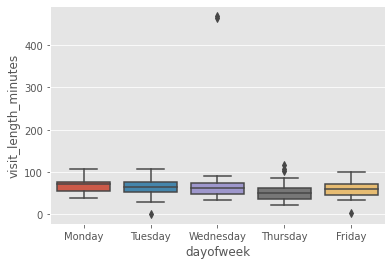

In [ ]:
axdayoftheweek = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_final)

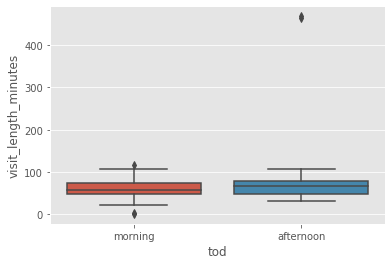

In [ ]:
axtod = sns.boxplot(x="tod", y="visit_length_minutes", data=df_final)

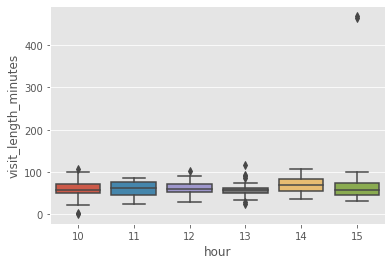

In [ ]:
axhour = sns.boxplot(x="hour", y="visit_length_minutes", data=df_final)

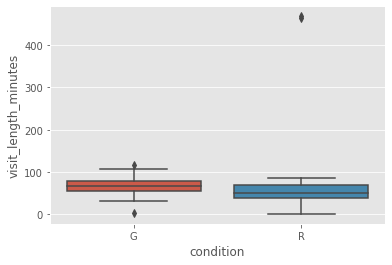

In [ ]:
axcondition = sns.boxplot(x="condition", y="visit_length_minutes", data=df_final)

## Outlier Removal

There are many odd outliers in this data. This section removes these outliers.

In [ ]:
df_outliers = df_final[(np.abs(stats.zscore(df_final['visit_length_minutes'])) < 3)]
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)]
print(df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)].count())

Patient                 2
newfrom                 2
newto                   2
visit_length            2
start_day               2
end_day                 2
sameday                 2
dayofweek               2
tod                     2
hour                    2
condition               2
visit_length_minutes    2
dtype: int64


## Removal of 0 Minute Journeys

The section below creates a dataframe where journeys that have a journey time of 0 minutes are removed.

In [ ]:
df_nozero = df_outliers.loc[(df_outliers[['visit_length_minutes']] != 0).all(axis=1)]
df_nozero

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday,morning,10,G,101.0000
1,G2342,2022-03-07 10:36:00,2022-03-07 11:28:00,0 days 00:52:00,7,7,equal,Monday,morning,10,G,52.0000
2,G2343,2022-03-07 10:26:00,2022-03-07 11:45:00,0 days 01:19:00,7,7,equal,Monday,morning,10,G,79.0000
3,G2344,2022-03-07 10:35:00,2022-03-07 11:43:00,0 days 01:08:00,7,7,equal,Monday,morning,10,G,68.0000
4,G2345,2022-03-07 10:37:00,2022-03-07 11:53:00,0 days 01:16:00,7,7,equal,Monday,morning,10,G,76.0000
5,G2346,2022-03-07 10:47:00,2022-03-07 11:59:00,0 days 01:12:00,7,7,equal,Monday,morning,10,G,72.0000
6,G2347,2022-03-07 10:57:00,2022-03-07 12:23:00,0 days 01:26:00,7,7,equal,Monday,morning,10,G,86.0000
7,G2348,2022-03-07 10:59:00,2022-03-07 11:55:00,0 days 00:56:00,7,7,equal,Monday,morning,10,G,56.0000
8,G2349,2022-03-07 11:18:00,2022-03-07 12:30:00,0 days 01:12:00,7,7,equal,Monday,morning,11,G,72.0000
9,G2350,2022-03-07 11:17:00,2022-03-07 12:34:00,0 days 01:17:00,7,7,equal,Monday,morning,11,G,77.0000


## Start of Final Analysis

In [ ]:
mean = df_outliers['visit_length_minutes'].mean()
print(mean)
print(df_nozero['visit_length_minutes'].mean())

61.3
61.3


## Day of Week Analysis and Plots

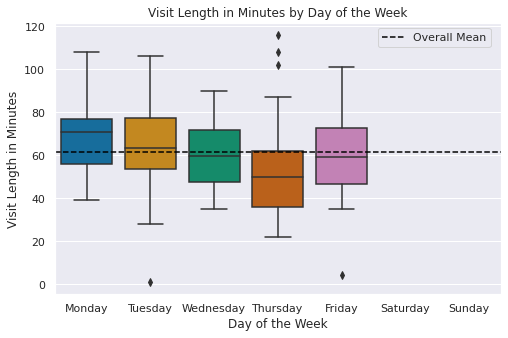

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_outliers, order = order_list)
svm.set_title('Visit Length in Minutes by Day of the Week')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Day of the Week')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('dayofweek_updated.png', bbox_inches='tight')

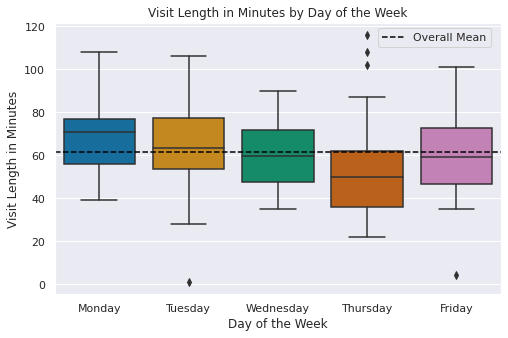

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="dayofweek", y="visit_length_minutes", data=df_outliers, order = order_list_noweekend)
svm.set_title('Visit Length in Minutes by Day of the Week')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Day of the Week')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('dayofweek_updated_noweekend.png', bbox_inches='tight')

## Time of Day Analysis and Plots

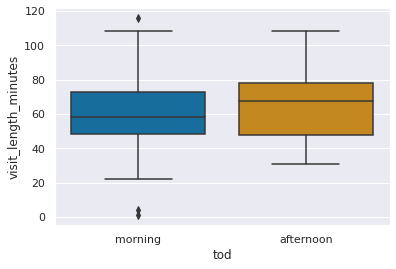

In [ ]:
axtod = sns.boxplot(x="tod", y="visit_length_minutes", data=df_outliers)

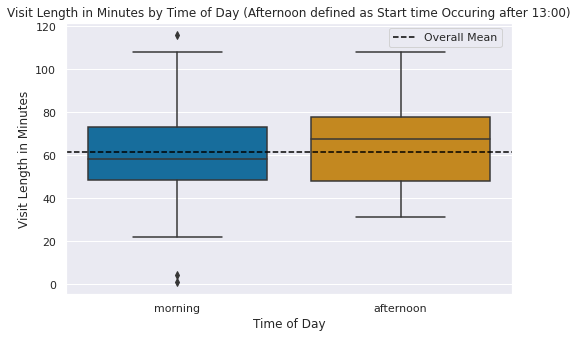

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="tod", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Time of Day (Afternoon defined as Start time Occuring after 13:00)')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Time of Day')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('timeofday_updated.png', bbox_inches='tight')

## Condition Analysis and Plots

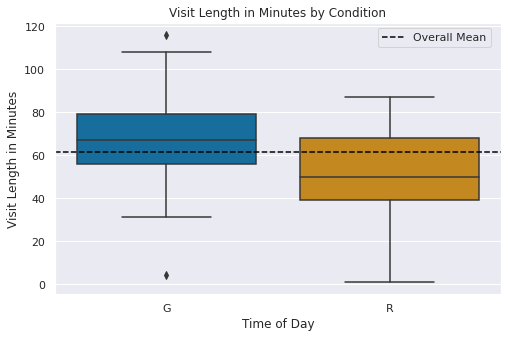

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="condition", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Condition')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Time of Day')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('condition_updated.png', bbox_inches='tight')

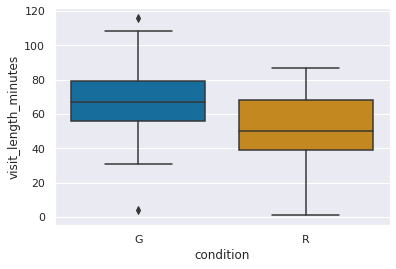

In [ ]:
axcondition = sns.boxplot(x="condition", y="visit_length_minutes", data=df_outliers)

## Starting Hour Analysis and Plots

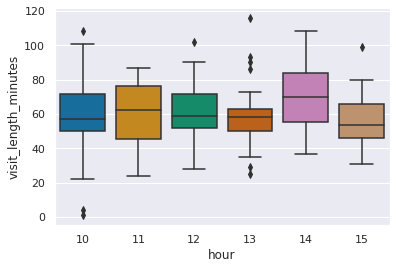

In [ ]:
axhour = sns.boxplot(x="hour", y="visit_length_minutes", data=df_outliers)

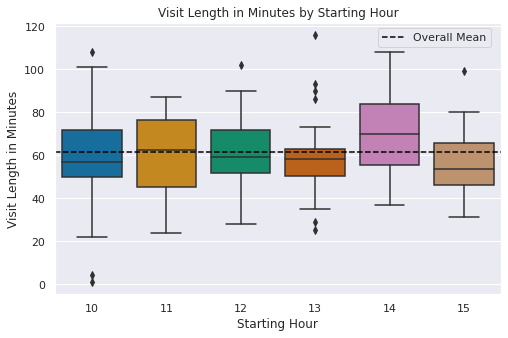

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(x="hour", y="visit_length_minutes", data=df_outliers)
svm.set_title('Visit Length in Minutes by Starting Hour')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Starting Hour')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('hour_updated.png', bbox_inches='tight')

## Summary Statistics of Each Analysis

The section below gets the summary statistics of each analysis done. These are used in the PowerPoint in the Findings folder in the MS Teams.

In [ ]:
dayoftheweekmean = df_outliers.groupby('dayofweek')['visit_length'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
df_outliers['visit_length_minutes'].describe()

count                                   180.0000
mean                                     61.3000
std                                      19.9776
min                                       1.0000
25%                                      48.0000
50%                                      59.5000
75%                                      74.2500
max                                     116.0000
Name: visit_length_minutes, dtype: float64

In [ ]:
df_final['visit_length_minutes'].describe()

count                                   182.0000
mean                                     65.7473
std                                      46.7397
min                                       1.0000
25%                                      48.0000
50%                                      60.5000
75%                                      75.0000
max                                     468.0000
Name: visit_length_minutes, dtype: float64

In [ ]:
df_final['visit_length_minutes'].median()

60.5

In [ ]:
df_outliers['visit_length'].describe()

count                          180
mean               0 days 01:01:18
std      0 days 00:19:58.656790144
min                0 days 00:01:00
25%                0 days 00:48:00
50%                0 days 00:59:30
75%                0 days 01:14:15
max                0 days 01:56:00
Name: visit_length, dtype: object

In [ ]:
df_final['visit_length'].describe()

count                          182
mean     0 days 01:05:44.835164835
std      0 days 00:46:44.381482170
min                0 days 00:01:00
25%                0 days 00:48:00
50%                0 days 01:00:30
75%                0 days 01:15:00
max                0 days 07:48:00
Name: visit_length, dtype: object

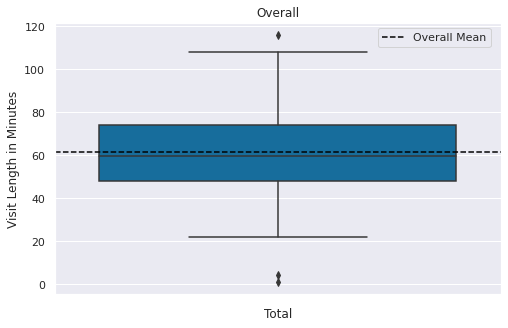

In [ ]:
sns.set_style('whitegrid')
sns.set_theme(palette="colorblind")
f,ax = plt.subplots(figsize=(8,5))
svm = sns.boxplot(y="visit_length_minutes", data=df_outliers)
svm.set_title('Overall')
svm.set_ylabel('Visit Length in Minutes')
svm.set_xlabel('Total')
svm.axhline(mean, linestyle = '--', color = 'black', label = 'Overall Mean')
svm.legend(bbox_to_anchor = (0.85, 1), loc = 'upper center')
figure1 = svm.get_figure()
figure1.savefig('tested.png', bbox_inches='tight')

In [ ]:
print('Nine')
nine_count = df_outliers['hour'][df_outliers['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_outliers['hour'][df_outliers['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_outliers['hour'][df_outliers['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_outliers['hour'][df_outliers['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_outliers['hour'][df_outliers['hour']==13].count()
print(one_count)

print('Two')
two_count = df_outliers['hour'][df_outliers['hour']==14].count()
print(two_count)

print('Three')
three_count = df_outliers['hour'][df_outliers['hour']==15].count()
print(three_count)

print('Four')
four_count = df_outliers['hour'][df_outliers['hour']==16].count()
print(four_count)

Nine
0
Ten
50
Eleven
38
Twelve
10
One
28
Two
36
Three
18
Four
0


In [ ]:
print('Monday Outlier')
mondayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Monday'].count()
print(mondayoutlier)

print('Tuesday Outlier')
tuesdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Tuesday'].count()
print(tuesdayoutlier)

print('Wednesday Outlier')
wednesdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Wednesday'].count()
print(wednesdayoutlier)

print('Thursday Outlier')
thursdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Thursday'].count()
print(thursdayoutlier)

print('Friday Outlier')
fridayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Friday'].count()
print(fridayoutlier)

print('Saturday Outlier')
saturdayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Saturday'].count()
print(saturdayoutlier)

print('Sunday Outlier')
sundayoutlier = df_outliers['dayofweek'][df_outliers['dayofweek']=='Sunday'].count()
print(sundayoutlier)

Monday Outlier
42
Tuesday Outlier
40
Wednesday Outlier
30
Thursday Outlier
37
Friday Outlier
31
Saturday Outlier
0
Sunday Outlier
0


In [ ]:
dayoftheweekmean = df_outliers.groupby('dayofweek')['visit_length_minutes'].mean(numeric_only=False)
dayoftheweekmean = dayoftheweekmean.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
dayoftheweekmean

dayofweek
Monday                                       68.1429
Tuesday                                      64.3250
Wednesday                                    60.7667
Thursday                                     52.0541
Friday                                       59.6774
Saturday                                         NaN
Sunday                                           NaN
Name: visit_length_minutes, dtype: float64

In [ ]:
print('G')
glaucomacount = df_outliers['condition'][df_outliers['condition']=='G'].count()
print(glaucomacount)

print('R')
rcount = df_outliers['condition'][df_outliers['condition']=='R'].count()
print(rcount)

G
105
R
75


In [ ]:
conditionmean = df_outliers.groupby('condition')['visit_length_minutes'].mean(numeric_only=False)
conditionmean

condition
G                                    67.9524
R                                    51.9867
Name: visit_length_minutes, dtype: float64

In [ ]:
print('morning')
morningcount = df_outliers['tod'][df_outliers['tod']=='morning'].count()
print(morningcount)

print('afternoon')
afternooncount = df_outliers['tod'][df_outliers['tod']=='afternoon'].count()
print(afternooncount)

morning
126
afternoon
54


In [ ]:
todmean = df_outliers.groupby('tod')['visit_length_minutes'].mean(numeric_only=False)
todmean

tod
afternoon                                    65.5185
morning                                      59.4921
Name: visit_length_minutes, dtype: float64

In [ ]:
print('Nine')
nine_count = df_outliers['hour'][df_outliers['hour']==9].count()
print(nine_count)

print('Ten')
ten_count = df_outliers['hour'][df_outliers['hour']==10].count()
print(ten_count)

print('Eleven')
eleven_count = df_outliers['hour'][df_outliers['hour']==11].count()
print(eleven_count)

print('Twelve')
twelve_count = df_outliers['hour'][df_outliers['hour']==12].count()
print(twelve_count)

print('One')
one_count = df_outliers['hour'][df_outliers['hour']==13].count()
print(one_count)

print('Two')
two_count = df_outliers['hour'][df_outliers['hour']==14].count()
print(two_count)

print('Three')
three_count = df_outliers['hour'][df_outliers['hour']==15].count()
print(three_count)

print('Four')
four_count = df_outliers['hour'][df_outliers['hour']==16].count()
print(four_count)

Nine
0
Ten
50
Eleven
38
Twelve
10
One
28
Two
36
Three
18
Four
0


In [ ]:
hourmean = df_outliers.groupby('hour')['visit_length_minutes'].mean(numeric_only=False)
hourmean

hour
10                                    59.0200
11                                    59.6842
12                                    61.3000
13                                    59.4286
14                                    70.0278
15                                    56.5000
Name: visit_length_minutes, dtype: float64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)]

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
85,G2430,2022-03-11 10:16:00,2022-03-11 10:20:00,0 days 00:04:00,11,11,equal,Friday,morning,10,G,4.0000
126,R1557,2022-03-08 10:54:00,2022-03-08 10:55:00,0 days 00:01:00,8,8,equal,Tuesday,morning,10,R,1.0000


In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] < 10).all(axis=1)].count()

Patient                 2
newfrom                 2
newto                   2
visit_length            2
start_day               2
end_day                 2
sameday                 2
dayofweek               2
tod                     2
hour                    2
condition               2
visit_length_minutes    2
dtype: int64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length_minutes']] == 0).all(axis=1)].count()

Patient                 0
newfrom                 0
newto                   0
visit_length            0
start_day               0
end_day                 0
sameday                 0
dayofweek               0
tod                     0
hour                    0
condition               0
visit_length_minutes    0
dtype: int64

In [ ]:
df_outliers.loc[(df_outliers[['visit_length']]).all(axis=1)].count()

Patient                 180
newfrom                 180
newto                   180
visit_length            180
start_day               180
end_day                 180
sameday                 180
dayofweek               180
tod                     180
hour                    180
condition               180
visit_length_minutes    180
dtype: int64

In [ ]:
df_outliers.nsmallest(5, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
126,R1557,2022-03-08 10:54:00,2022-03-08 10:55:00,0 days 00:01:00,8,8,equal,Tuesday,morning,10,R,1.0000
85,G2430,2022-03-11 10:16:00,2022-03-11 10:20:00,0 days 00:04:00,11,11,equal,Friday,morning,10,G,4.0000
153,R1587,2022-03-10 10:18:00,2022-03-10 10:40:00,0 days 00:22:00,10,10,equal,Thursday,morning,10,R,22.0000
157,R1591,2022-03-10 11:07:00,2022-03-10 11:31:00,0 days 00:24:00,10,10,equal,Thursday,morning,11,R,24.0000
156,R1590,2022-03-10 11:01:00,2022-03-10 11:26:00,0 days 00:25:00,10,10,equal,Thursday,morning,11,R,25.0000


In [ ]:
df_outliers.nsmallest(5, 'visit_length_minutes')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
126,R1557,2022-03-08 10:54:00,2022-03-08 10:55:00,0 days 00:01:00,8,8,equal,Tuesday,morning,10,R,1.0000
85,G2430,2022-03-11 10:16:00,2022-03-11 10:20:00,0 days 00:04:00,11,11,equal,Friday,morning,10,G,4.0000
153,R1587,2022-03-10 10:18:00,2022-03-10 10:40:00,0 days 00:22:00,10,10,equal,Thursday,morning,10,R,22.0000
157,R1591,2022-03-10 11:07:00,2022-03-10 11:31:00,0 days 00:24:00,10,10,equal,Thursday,morning,11,R,24.0000
156,R1590,2022-03-10 11:01:00,2022-03-10 11:26:00,0 days 00:25:00,10,10,equal,Thursday,morning,11,R,25.0000


In [ ]:
df_outliers.nlargest(5, 'visit_length_minutes')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
78,G2423,2022-03-10 13:58:00,2022-03-10 15:54:00,0 days 01:56:00,10,10,equal,Thursday,morning,13,G,116.0000
18,G2359,2022-03-07 14:05:00,2022-03-07 15:53:00,0 days 01:48:00,7,7,equal,Monday,afternoon,14,G,108.0000
67,G2411,2022-03-10 10:25:00,2022-03-10 12:13:00,0 days 01:48:00,10,10,equal,Thursday,morning,10,G,108.0000
40,G2382,2022-03-08 14:05:00,2022-03-08 15:51:00,0 days 01:46:00,8,8,equal,Tuesday,afternoon,14,G,106.0000
42,G2384,2022-03-08 14:38:00,2022-03-08 16:23:00,0 days 01:45:00,8,8,equal,Tuesday,afternoon,14,G,105.0000


In [ ]:
df_outliers.nlargest(5, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
78,G2423,2022-03-10 13:58:00,2022-03-10 15:54:00,0 days 01:56:00,10,10,equal,Thursday,morning,13,G,116.0000
18,G2359,2022-03-07 14:05:00,2022-03-07 15:53:00,0 days 01:48:00,7,7,equal,Monday,afternoon,14,G,108.0000
67,G2411,2022-03-10 10:25:00,2022-03-10 12:13:00,0 days 01:48:00,10,10,equal,Thursday,morning,10,G,108.0000
40,G2382,2022-03-08 14:05:00,2022-03-08 15:51:00,0 days 01:46:00,8,8,equal,Tuesday,afternoon,14,G,106.0000
42,G2384,2022-03-08 14:38:00,2022-03-08 16:23:00,0 days 01:45:00,8,8,equal,Tuesday,afternoon,14,G,105.0000


In [ ]:
df_final.nlargest(20, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
150,R1583,2022-03-09 15:12:00,2022-03-09 23:00:00,0 days 07:48:00,9,9,equal,Wednesday,afternoon,15,R,468.0000
182,R2409,2022-03-09 15:16:00,2022-03-09 23:00:00,0 days 07:44:00,9,9,equal,Wednesday,afternoon,15,R,464.0000
78,G2423,2022-03-10 13:58:00,2022-03-10 15:54:00,0 days 01:56:00,10,10,equal,Thursday,morning,13,G,116.0000
18,G2359,2022-03-07 14:05:00,2022-03-07 15:53:00,0 days 01:48:00,7,7,equal,Monday,afternoon,14,G,108.0000
67,G2411,2022-03-10 10:25:00,2022-03-10 12:13:00,0 days 01:48:00,10,10,equal,Thursday,morning,10,G,108.0000
40,G2382,2022-03-08 14:05:00,2022-03-08 15:51:00,0 days 01:46:00,8,8,equal,Tuesday,afternoon,14,G,106.0000
42,G2384,2022-03-08 14:38:00,2022-03-08 16:23:00,0 days 01:45:00,8,8,equal,Tuesday,afternoon,14,G,105.0000
75,G2420,2022-03-10 12:05:00,2022-03-10 13:47:00,0 days 01:42:00,10,10,equal,Thursday,morning,12,G,102.0000
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday,morning,10,G,101.0000
98,G2445,2022-03-11 14:08:00,2022-03-11 15:49:00,0 days 01:41:00,11,11,equal,Friday,afternoon,14,G,101.0000


In [ ]:
df_outliers.nlargest(20, 'visit_length')

,Patient,newfrom,newto,visit_length,start_day,end_day,sameday,dayofweek,tod,hour,condition,visit_length_minutes
78,G2423,2022-03-10 13:58:00,2022-03-10 15:54:00,0 days 01:56:00,10,10,equal,Thursday,morning,13,G,116.0000
18,G2359,2022-03-07 14:05:00,2022-03-07 15:53:00,0 days 01:48:00,7,7,equal,Monday,afternoon,14,G,108.0000
67,G2411,2022-03-10 10:25:00,2022-03-10 12:13:00,0 days 01:48:00,10,10,equal,Thursday,morning,10,G,108.0000
40,G2382,2022-03-08 14:05:00,2022-03-08 15:51:00,0 days 01:46:00,8,8,equal,Tuesday,afternoon,14,G,106.0000
42,G2384,2022-03-08 14:38:00,2022-03-08 16:23:00,0 days 01:45:00,8,8,equal,Tuesday,afternoon,14,G,105.0000
75,G2420,2022-03-10 12:05:00,2022-03-10 13:47:00,0 days 01:42:00,10,10,equal,Thursday,morning,12,G,102.0000
0,G2341,2022-03-07 10:20:00,2022-03-07 12:01:00,0 days 01:41:00,7,7,equal,Monday,morning,10,G,101.0000
98,G2445,2022-03-11 14:08:00,2022-03-11 15:49:00,0 days 01:41:00,11,11,equal,Friday,afternoon,14,G,101.0000
46,G2388,2022-03-08 15:11:00,2022-03-08 16:50:00,0 days 01:39:00,8,8,equal,Tuesday,afternoon,15,G,99.0000
15,G2356,2022-03-07 13:45:00,2022-03-07 15:18:00,0 days 01:33:00,7,7,equal,Monday,morning,13,G,93.0000


## CSV Creation

This creates a CSV of the patient journies which can be used for subsequent analysis (e.g. cluster analysis).

In [ ]:
phase3df = df_outliers[['Patient', 'newfrom', 'newto', 'visit_length', 'dayofweek', 'tod', 'hour', 'condition', 'visit_length_minutes']].copy()
phase3df.to_csv('phase3df.csv', index=False)